## 建立英文詞頻矩陣

In [4]:
content = ['How to format my hard disk','Hard disk format problems']

from sklearn.feature_extraction.text import CountVectorizer
#?CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(content)
X

<2x7 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [6]:
print(vectorizer.get_feature_names())
X.toarray()

['disk', 'format', 'hard', 'how', 'my', 'problems', 'to']


array([[1, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 0, 0, 1, 0]], dtype=int64)

In [13]:
content = ['How to format my hard disk',\
           'Hard disk format problems', \
           'How hard is this problem']

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=2)
X = vectorizer.fit_transform(content)
X

<3x4 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [14]:
print(vectorizer.get_feature_names())
X.toarray()

['disk', 'format', 'hard', 'how']


array([[1, 1, 1, 1],
       [1, 1, 1, 0],
       [0, 0, 1, 1]], dtype=int64)

## 規則模型

In [18]:
Q = '金早安全出現問題'
A = '您也早安' if '早安' in Q else '我不知道你在說什麼'
A

'您也早安'

## 利用詞頻矩陣做資料檢索

In [22]:
%ls data\toy

 磁碟區 C 中的磁碟是 OS 7
 磁碟區序號:  C485-A13C

 C:\Users\User\pytextmining\data\toy 的目錄

2015/10/12  上午 10:25    <DIR>          .
2015/10/12  上午 10:25    <DIR>          ..
2015/10/12  上午 10:25                92 01.txt
2015/10/12  上午 10:25                47 02.txt
2015/10/12  上午 10:25                47 03.txt
2015/10/12  上午 10:25                29 04.txt
2015/10/12  上午 10:25                89 05.txt
               5 個檔案             304 位元組
               2 個目錄  10,980,343,808 位元組可用


In [30]:
import os
path = 'data/toy/'
posts = []
for fname in os.listdir(path):
    with open(path + fname) as f:
        posts.append(f.read())

In [31]:
posts

['This is a toy post about machine learning. Actually, it contains not much interesting stuff.',
 'Imaging databases provide storage capabilities.',
 'Most imaging databases safe images permanently.',
 'Imaging databases store data.',
 'Imaging databases store data. Imaging databases store data. Imaging databases store data.']

In [32]:
posts = ['This is a toy post about machine learning. Actually, it contains not much interesting stuff.',
 'Imaging databases provide storage capabilities.',
 'Most imaging databases safe images permanently.',
 'Imaging databases store data.',
 'Imaging databases store data. Imaging databases store data. Imaging databases store data.']

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df = 1)
X_train = vectorizer.fit_transform(posts)
X_train

<5x25 sparse matrix of type '<class 'numpy.int64'>'
	with 33 stored elements in Compressed Sparse Row format>

In [48]:
X_train.shape

(5, 25)

In [49]:
print(vectorizer.get_feature_names())
X_train.toarray()

['about', 'actually', 'capabilities', 'contains', 'data', 'databases', 'images', 'imaging', 'interesting', 'is', 'it', 'learning', 'machine', 'most', 'much', 'not', 'permanently', 'post', 'provide', 'safe', 'storage', 'store', 'stuff', 'this', 'toy']


array([[1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
        1, 1, 1],
       [0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0],
       [0, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
        0, 0, 0]], dtype=int64)

In [80]:
new_post = 'imaging database'
new_post_vec = vectorizer.transform([new_post])
new_post_vec

<1x25 sparse matrix of type '<class 'numpy.int64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [81]:
print(vectorizer.get_feature_names())
new_post_vec.toarray()

['about', 'actually', 'capabilities', 'contains', 'data', 'databases', 'images', 'imaging', 'interesting', 'is', 'it', 'learning', 'machine', 'most', 'much', 'not', 'permanently', 'post', 'provide', 'safe', 'storage', 'store', 'stuff', 'this', 'toy']


array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0]], dtype=int64)

In [62]:
import scipy as sp
def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta)

In [74]:
import numpy as np
import math
v1 = np.array([1,0,0,1,1])
v2 = np.array([1,1,0,0,1])
math.sqrt(((v2 - v1) ** 2).sum())

1.4142135623730951

In [75]:
dist_raw(v1, v2)

1.4142135623730951

In [76]:
import scipy as sp
def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

In [82]:
import sys
best_doc = None
best_dist = 999
best_i = None

num_samples = len(posts)
for i in range(0, num_samples):
    post = posts[i]
    if post==new_post:
        continue
    post_vec = X_train.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    print("=== Post %i with dist=%.2f: %s"%(i, d, post))
    if d<best_dist:
        best_dist = d
        best_i = i
print("Best post is %i with dist=%.2f"%(best_i, best_dist))

=== Post 0 with dist=3.87: This is a toy post about machine learning. Actually, it contains not much interesting stuff.
=== Post 1 with dist=2.00: Imaging databases provide storage capabilities.
=== Post 2 with dist=2.24: Most imaging databases safe images permanently.
=== Post 3 with dist=1.73: Imaging databases store data.
=== Post 4 with dist=5.57: Imaging databases store data. Imaging databases store data. Imaging databases store data.
Best post is 3 with dist=1.73


In [83]:
def dist(v1, v2):
    v1_normalized  = v1 / sp.linalg.norm(v1.toarray()) 
    v2_normalized  = v2 / sp.linalg.norm(v2.toarray())
    delta = v1_normalized - v2_normalized
    return sp.linalg.norm(delta.toarray())


In [84]:
import sys
best_doc = None
best_dist = 999
best_i = None

num_samples = len(posts)
for i in range(0, num_samples):
    post = posts[i]
    if post==new_post:
        continue
    post_vec = X_train.getrow(i)
    d = dist(post_vec, new_post_vec)
    print("=== Post %i with dist=%.2f: %s"%(i, d, post))
    if d<best_dist:
        best_dist = d
        best_i = i
print("Best post is %i with dist=%.2f"%(best_i, best_dist))

=== Post 0 with dist=1.41: This is a toy post about machine learning. Actually, it contains not much interesting stuff.
=== Post 1 with dist=1.05: Imaging databases provide storage capabilities.
=== Post 2 with dist=1.09: Most imaging databases safe images permanently.
=== Post 3 with dist=1.00: Imaging databases store data.
=== Post 4 with dist=1.00: Imaging databases store data. Imaging databases store data. Imaging databases store data.
Best post is 3 with dist=1.00


## NLTK Stemming

In [85]:
! pip install nltk

In [87]:
import nltk.stem
s = nltk.stem.SnowballStemmer('english')
s.stem('graphics')

'graphic'

In [89]:
print(s.stem("imaging"))
print(s.stem("image"))
print(s.stem("imagination"))
print(s.stem("imagine"))

imag
imag
imagin
imagin


In [95]:
import nltk.stem
english_stemmer = nltk.stem.SnowballStemmer('english')

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))


## 移除Stopwords

In [96]:
#vectorizer = CountVectorizer()
#vectorizer = CountVectorizer(stop_words=['it'])
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(posts)
print(vectorizer.get_feature_names())

['actually', 'capabilities', 'contains', 'data', 'databases', 'images', 'imaging', 'interesting', 'learning', 'machine', 'permanently', 'post', 'provide', 'safe', 'storage', 'store', 'stuff', 'toy']


In [104]:
vectorizer = StemmedCountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(posts)
print(vectorizer.get_feature_names())

['actual', 'capabl', 'contain', 'data', 'databas', 'imag', 'interest', 'learn', 'machin', 'perman', 'post', 'provid', 'safe', 'storag', 'store', 'stuff', 'toy']


In [105]:
new_post = 'imaging database'
new_post_vec = vectorizer.transform([new_post])
new_post_vec

<1x17 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [106]:
import sys
best_doc = None
best_dist = 999
best_i = None

num_samples = len(posts)
for i in range(0, num_samples):
    post = posts[i]
    if post==new_post:
        continue
    post_vec = X_train.getrow(i)
    d = dist(post_vec, new_post_vec)
    print("=== Post %i with dist=%.2f: %s"%(i, d, post))
    if d<best_dist:
        best_dist = d
        best_i = i
print("Best post is %i with dist=%.2f"%(best_i, best_dist))

=== Post 0 with dist=1.41: This is a toy post about machine learning. Actually, it contains not much interesting stuff.
=== Post 1 with dist=0.86: Imaging databases provide storage capabilities.
=== Post 2 with dist=0.63: Most imaging databases safe images permanently.
=== Post 3 with dist=0.77: Imaging databases store data.
=== Post 4 with dist=0.77: Imaging databases store data. Imaging databases store data. Imaging databases store data.
Best post is 2 with dist=0.63


## 中文詞頻矩陣

In [111]:
import jieba
jieba.load_userdict('userdict.txt')

a = ['柯文哲為了大巨蛋一事找趙藤雄算帳', '柯P將不在大巨蛋舉辦世運會']

corpus = [' '.join(jieba.cut(s)) for s in a]
corpus

['柯文哲 為 了 大巨蛋 一事 找 趙藤雄 算帳', '柯P 將不在 大巨蛋 舉辦 世運會']

In [114]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
X

<2x9 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [116]:
print(vectorizer.get_feature_names())
print(X.toarray())

['一事', '世運會', '大巨蛋', '將不在', '柯p', '柯文哲', '算帳', '舉辦', '趙藤雄']
[[1 0 1 0 0 1 1 0 1]
 [0 1 1 1 1 0 0 1 0]]


## 建立中文同義詞字典

In [117]:
import requests
term = '柯文哲'
res = requests.get('https://zh.wikipedia.org/wiki/{}'.format(term))

In [123]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')
'/'.join([word.text for word in soup.select_one('.mw-parser-output p').select('b')])

'柯文哲/柯P/KP'

In [124]:
synonym_dic = {}
for s in open('synonym.txt'):
    synonym = s.strip().split('/')
    for w in synonym[1:]:
        synonym_dic[w.lower()]  = synonym[0]
synonym_dic

{'taiwan': '台灣', '柯p': '柯文哲', '特郎普': '川普', '臺灣': '台灣'}

In [128]:
a = '柯p'
synonym_dic.get(a, a)

'柯文哲'

In [129]:
class SynonymCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(SynonymCountVectorizer, self).build_analyzer()
        return lambda doc: (synonym_dic.get(w, w) for w in analyzer(doc))

In [130]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = SynonymCountVectorizer()
X = vectorizer.fit_transform(corpus)
X

<2x8 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [131]:
print(vectorizer.get_feature_names())
print(X.toarray())

['一事', '世運會', '大巨蛋', '將不在', '柯文哲', '算帳', '舉辦', '趙藤雄']
[[1 0 1 0 1 1 0 1]
 [0 1 1 1 1 0 1 0]]


In [132]:
stopwords = ['一事', '將不在']
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = SynonymCountVectorizer(stop_words=stopwords)
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.toarray())

['世運會', '大巨蛋', '柯文哲', '算帳', '舉辦', '趙藤雄']
[[0 1 1 1 0 1]
 [1 1 1 0 1 0]]


## 計算文章相似度

In [133]:
import pandas
news = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/pytextmining/master/data/20150628news.xlsx')

In [143]:
import jieba
jieba.load_userdict('userdict.txt')
corpus = []
titles = []

for rec in news.iterrows():
    corpus.append(' '.join(jieba.cut(rec[1]['description'])))
    titles.append(rec[1]['title'])

In [145]:
vectorizer = SynonymCountVectorizer(min_df = 5)
X = vectorizer.fit_transform(corpus)
X

<147x796 sparse matrix of type '<class 'numpy.int64'>'
	with 7796 stored elements in Compressed Sparse Row format>

In [148]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarities = cosine_similarity(X)

In [154]:
import numpy
a = numpy.array([50,69,53,72,80])
a.argsort()

array([0, 2, 1, 3, 4], dtype=int64)

In [176]:
pos  = 2 
print(titles[pos])
for idx in cosine_similarities[pos].argsort()[::-1][1:11]:
    if cosine_similarities[pos][idx] >= 0.3:
        print(idx, titles[idx], cosine_similarities[pos][idx])

希臘國內三分一自動櫃員機現金短缺
82 希臘1／3提款機錢被提光 0.491235932432
24 呂紹煒專欄：違約與退出 希臘與歐洲才能重生(上) 0.466940209459
37 希臘違約在即  歐盟全力穩定經濟 0.404847199018
12 歐元區財長拒希臘延長救助計劃 0.402933260423
84 確保銀行穩定 希臘續與ECB緊密合作 0.387731312212
42 希債協議  法國願盡最後斡旋努力 0.367890675588
39 希臘脫歐變可能 歐洲衝擊大 0.350756035891
114 希臘盼展延債務 歐元區拒絕 0.338061701891
92 希臘態度強硬 歐元區耐心漸失 0.305082055409


In [178]:
import jieba
newarticle = '獨立樂團草東沒有派對在2017年金曲獎上，以專輯《醜奴兒》拿下「最佳樂團」與「最佳新人」獎，堅強實力獲得天團五月天稱讚，主唱巫堵及世暄已於今年3月退伍，隨即宣布世界巡迴演唱會喜訊，消息一出，馬上讓粉絲激動沸騰，草東製作人李孝祖也放聲宣布，「草東回來了！」'
newseg     = ' '.join(jieba.cut(newarticle))
new_vec    = vectorizer.transform([newseg])

In [181]:
X

<147x796 sparse matrix of type '<class 'numpy.int64'>'
	with 7796 stored elements in Compressed Sparse Row format>

In [180]:
new_vec

<1x796 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [189]:
cs = cosine_similarity(new_vec, X)
for idx in cs[0].argsort()[::-1][0:10]:
    print(titles[idx])

第26屆金曲獎 陳奕迅奪歌王、阿妹封歌后
僅次Jolin！徐佳瑩入圍6獎全槓被封遺珠
金曲26／蔡依林淚奪最佳專輯＋完整得獎名單
蔡依林呸大贏家  金曲最佳專輯獎
陳奕迅、張惠妹稱王封后  蔡依林抱回最大獎
金曲最風光！蔡依林紅毯全勝又獲3獎成大贏家
金曲獎完整得獎名單！阿妹封后 陳奕迅稱王
陳奕迅、莫文蔚伴侶均不知阿娜答金曲獲獎
蔡依林淚奪金曲 錦榮傳訊恭喜
金曲最佳國語專輯：呸


## 文章分群

In [190]:
import pandas
news = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/pytextmining/master/data/20150628news.xlsx')

In [192]:
news.head()

,category,description,pubdate,title
0,社會/生活,新北市八仙水上樂園昨晚發生粉塵爆炸，新北市衛生局統計到目前為止，由救護車送醫再加上自行送醫的...,"Sun, 28 Jun 2015 07:40:00 +0800",八仙塵爆 五相關人依公共危險重傷害法辦
1,社會/生活,新北市八仙樂園昨天晚上(6/27)舉辦活動，過程中噴灑大量玉米粉而引發粉塵爆炸，根據最新統計...,"Sun, 28 Jun 2015 07:40:00 +0800",八仙樂園意外 病患持續增加中
2,財經/要聞,希臘債務違約限期逼近，資金持續外流。路透社引述三間銀行的消息指出，希臘國內有3分之1的自動櫃...,"Sun, 28 Jun 2015 07:40:00 +0800",希臘國內三分一自動櫃員機現金短缺
3,社會/生活,台鐵「新基隆車站」第一階段工程本月底完成，台鐵表示，明天（29號）啟用後，由於南站周邊道路尚...,"Sun, 28 Jun 2015 07:40:00 +0800",台鐵新基隆車站29日正式啟用
4,財經/要聞,《中國時報》\n●樂園變煉獄 派對驚爆 逾300人遭火紋身\n八仙樂園昨晚舉辦「COLOR ...,"Sun, 28 Jun 2015 07:38:17 +0800",6月28日各報頭版要聞


In [194]:
import jieba
jieba.load_userdict('userdict.txt')

corpus = []
titles = []
for rec in news.iterrows():
    corpus.append(' '.join(jieba.cut(rec[1]['description'])))
    titles.append(rec[1]['title'])

In [195]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [197]:
X

<147x12760 sparse matrix of type '<class 'numpy.int64'>'
	with 23748 stored elements in Compressed Sparse Row format>

In [201]:
from sklearn.metrics.pairwise import cosine_similarity
n_cosine_similarities = cosine_similarity(X)

In [202]:
n_cosine_similarities.shape

(147, 147)

In [206]:
from sklearn import cluster 
km = cluster.KMeans(n_clusters = 4, init='k-means++', random_state = 42)
c = km.fit_predict(n_cosine_similarities)

In [213]:
import numpy as np
titles_ary = np.array(titles)
titles_ary[c == 3]

array(['希臘國內三分一自動櫃員機現金短缺', '歐元區財長拒希臘延長救助計劃', '呂紹煒專欄：違約與退出 希臘與歐洲才能重生(上)',
       '希臘違約在即  歐盟全力穩定經濟', '希臘脫歐變可能 歐洲衝擊大', '希債協議  法國願盡最後斡旋努力',
       '希臘1／3提款機錢被提光', '確保銀行穩定 希臘續與ECB緊密合作', '希臘態度強硬 歐元區耐心漸失',
       '希臘盼展延債務 歐元區拒絕'], 
      dtype='<U26')

## Silhouette

In [215]:
from sklearn.metrics import silhouette_score
sil_ary = []
for k in range(2,21):
    km = cluster.KMeans(n_clusters = k, init='k-means++', random_state = 42)
    c = km.fit_predict(n_cosine_similarities)
    sil_ary.append({'group':k, 'silhouette':silhouette_score(n_cosine_similarities, labels =c)})

Populating the interactive namespace from numpy and matplotlib


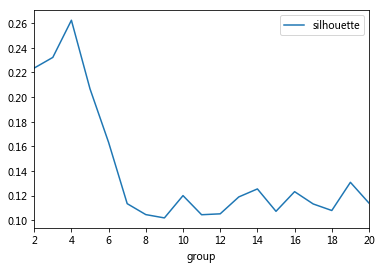

In [218]:
%pylab inline
import pandas
df = pandas.DataFrame(sil_ary)
df.plot(x='group', y = 'silhouette')

## 改判斷20171214 新聞

In [219]:
import pandas
news = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/pytextmining/master/data/20171214news.xlsx')

In [221]:
import jieba
jieba.load_userdict('userdict.txt')

corpus = []
titles = []
for rec in news.iterrows():
    corpus.append(' '.join(jieba.cut(rec[1]['content'])))
    titles.append(rec[1]['title'])

In [222]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [223]:
from sklearn.metrics.pairwise import cosine_similarity
n_cosine_similarities = cosine_similarity(X)

In [224]:
from sklearn.metrics import silhouette_score
sil_ary = []
for k in range(2,21):
    km = cluster.KMeans(n_clusters = k, init='k-means++', random_state = 42)
    c = km.fit_predict(n_cosine_similarities)
    sil_ary.append({'group':k, 'silhouette':silhouette_score(n_cosine_similarities, labels =c)})

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['rec']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


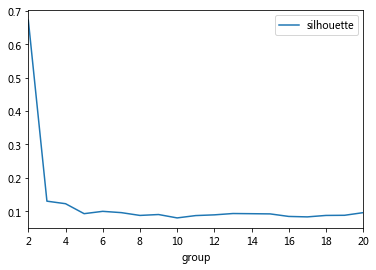

In [225]:
%pylab inline
import pandas
df = pandas.DataFrame(sil_ary)
df.plot(x='group', y = 'silhouette')

In [226]:
from sklearn import cluster 
km = cluster.KMeans(n_clusters = 4, init='k-means++', random_state = 42)
c = km.fit_predict(n_cosine_similarities)

In [230]:
import numpy as np
titles_ary = np.array(titles)
titles_ary[c == 2]

array(['小嫻婚變冒毒菇\u3000勾于美人「奉茶」夢魘', '人妻離婚5個月產女\u3000他驚覺頭上綠綠der',
       '醉女盧小小\u3000女警帥爆！突然霸氣送她側摔\u3000', '遭粉絲頁冒名捲「正嫻」口水戰\u3000于美人：跟我真的無關！',
       '明明是好康分享文\u3000網友卻瘋喊噁心慎入', '「想抱孫要看天！」\u3000他批小嫻婆婆殘忍強逼',
       '砲轟小嫻被酸民攻陷\u3000「何三姑」粉絲頁關了', '【好聚不好散】離婚掏出6千萬\u3000這女星比小嫻還慘',
       '【狗仔偷拍】小嫻搬離何守正家租66坪房\u3000月租6萬元', '許聖梅心疼小嫻被當空氣\u3000爆何守正「有兩個女學員」',
       '【動畫解盤】毒菇跳火線譙seafood\u3000小嫻難瘦香菇', '十二月十四日各報頭條搶先報',
       '不捨善良小嫻慘遭婚變\u3000乃哥「命運捉弄人」', '【獨家】小嫻賣房求子\u3000婆婆竟拒入籍何家',
       '【毒菇護弟】何守正姊姊不是華岡七仙女\u3000美法連線批小嫻',
       '員工開勞斯萊斯連撞3次\u3000剉！他老闆是治平大哥\u3000', '小嫻離婚導火線\u3000拉何守正信妙禪',
       '【狗仔偷拍】何守正現身！「全台最沒尊嚴的婆婆」也出來了', '小嫻中分手魔咒！ 同公司4女星全都婚變',
       '他因為小嫻婚變被分手\u3000網友跪求：拜託別放生', '潔哥目睹「正嫻之變」\u3000驚呼：靠北系列竟是真的',
       '何守正姐姐神護航！遭網友酸：全台最討人厭大姑', '小嫻別傻傻被欺負！女律師說「姐寶」就要這樣對付',
       '【小嫻婚變】他說很奇怪\u3000「一定是男生劈腿？」', '教友小嫻婚姻觸礁\u3000曾之喬談情避不開Seafood',
       '小嫻守正結婚在台沒登記\u3000想離婚只有兩條路', '胡瓜2個月前耳聞小嫻婚變\u3000震驚之餘好心疼',
       '昔日搭檔談小嫻婚變\u3000曾國城這樣說', '何守正兩個姊姊護航扯婆媳\u3000「他」戳破媽寶特色',
       '大姑出面護弟！轟小嫻不能生「媽媽是全台最沒有尊嚴的婆婆

## Community Detection

In [231]:
n_cosine_similarities

array([[ 1.        ,  0.03170452,  0.05228104, ...,  0.09728591,
         0.05344909,  0.02901404],
       [ 0.03170452,  1.        ,  0.02798884, ...,  0.0178714 ,
         0.01213934,  0.03986744],
       [ 0.05228104,  0.02798884,  1.        , ...,  0.02526008,
         0.01787311,  0.09818575],
       ..., 
       [ 0.09728591,  0.0178714 ,  0.02526008, ...,  1.        ,
         0.11503612,  0.05233539],
       [ 0.05344909,  0.01213934,  0.01787311, ...,  0.11503612,
         1.        ,  0.0666551 ],
       [ 0.02901404,  0.03986744,  0.09818575, ...,  0.05233539,
         0.0666551 ,  1.        ]])

In [243]:
m.shape

(899, 899)

In [236]:
import networkx as nx
m = (n_cosine_similarities >=0.3).astype(int)
G = nx.from_numpy_matrix(m)

## 安裝 python Louvain

In [237]:
! pip install python-louvain

In [238]:
import community
comm = community.best_partition(G)

In [242]:
len(set(list(comm.values())))

588

In [246]:
cluster_ary = numpy.array(list(comm.values()))

In [250]:
from collections import Counter
c = Counter(cluster_ary)
c.most_common(10)

[(15, 34),
 (3, 30),
 (91, 24),
 (5, 16),
 (59, 13),
 (151, 11),
 (167, 10),
 (19, 8),
 (99, 8),
 (97, 7)]

In [259]:
titles_ary[cluster_ary == 99]

array(['驚！\u3000野生捕獲恐龍遛汪星人', '驚！\u3000野生捕獲恐龍遛汪星人', '搔癢無尾熊 表情超enjoy',
       '【笑翻片】各種抓！動物止癢出奇招', '【保護片】就是不能下水！狗狗護小主人', '群狗亂舞開趴\u3000畫面太「美」讓人不敢看',
       '一家人霸氣合照\u3000萌到爆！', '超近看螞蟻食蜂蜜\u3000竟感到療癒？'], 
      dtype='<U36')